# Q1: Load and Summary

In [1]:
import pandas as pd
data_q1=pd.read_json('transactions.txt',lines=True)
print('There are %d records and %d features(fields) in this data set'%(data_q1.shape[0],data_q1.shape[1]))

There are 641914 records and 29 features(fields) in this data set


## 1.1 Missing data exploration

In [2]:
import numpy as np
data_q1=data_q1.replace('',np.nan)
print('There are 6 features are entire empty!')
data_q1.isna().sum()

There are 6 features are entire empty!


accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

In [3]:
##drop features with too many missing value
drop_feature=['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd']
data_q1.drop(drop_feature,axis=1,inplace=True)

In [4]:
print('Left features with missing data:')
feature_NA_df=data_q1.isna().sum()
feature_has_NA=feature_NA_df[feature_NA_df>0]
NA_features=feature_has_NA.index.values
print(feature_has_NA)

Left features with missing data:
acqCountry             3913
merchantCountryCode     624
posConditionCode        287
posEntryMode           3345
transactionType         589
dtype: int64


## 1.2 Feature type grouping

In [5]:
##create a feature type dictionary for the convenience of searching different types of features
interval_features=['currentBalance','transactionAmount','creditLimit','availableMoney']
categorical_features=['customerId','accountNumber','acqCountry','cardPresent',
                      'merchantCategoryCode','merchantCountryCode','cardCVV','cardLast4Digits',
                     'merchantName','posConditionCode','posEntryMode','enteredCVV',
                     'transactionType','expirationDateKeyInMatch','isFraud']
date_features=['accountOpenDate','currentExpDate','dateOfLastAddressChange',
              'transactionDateTime']
feature_type_dict={'interval_features':interval_features,
                  'categorical_features':categorical_features,
                  'date_features':date_features}
print('The total number of features in feature_type_dictionary is: %d'%sum([len(i) for i in feature_type_dict.values()]))
print('The total number of features in data_q1 is: %d'%len(data_q1.columns))
print('Therefore, we seperate three disjoint feature groups as interval, categorical and date')

The total number of features in feature_type_dictionary is: 23
The total number of features in data_q1 is: 23
Therefore, we seperate three disjoint feature groups as interval, categorical and date


## 1.3 Interval features summary

In [6]:
interval_features_summary=data_q1[interval_features].describe()
interval_features_na_count=pd.DataFrame([data_q1[interval_features].isna().sum()],
                                           index=['NA_count'],
                                           columns=interval_features)
interval_features_summary.append(interval_features_na_count)

,currentBalance,transactionAmount,creditLimit,availableMoney
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,4044.382035,135.162497,10697.210608,6652.828573
std,5945.510224,147.053302,11460.359133,9227.132275
min,0.000000,0.000000,250.000000,-1244.930000
25%,502.442500,32.320000,5000.000000,1114.970000
50%,2151.860000,85.800000,7500.000000,3578.165000
75%,5005.890000,189.030000,15000.000000,8169.185000
max,47496.500000,1825.250000,50000.000000,50000.000000
NA_count,0.000000,0.000000,0.000000,0.000000


## 1.4 Categorical features summary

In [7]:
##Display the summary of all categorical features
for i in categorical_features:
    print('******'+i+'*******')
    print(data_q1[i].value_counts())
    print('NA_count:%d'%data_q1[i].isna().sum())

******customerId*******
318001076    10034
456044564     8382
812328116     5494
838085703     5129
239875038     4705
877017103     4435
278064853     4227
353215513     3756
314506271     3410
917216469     3258
822203001     3046
412558887     3044
901922840     3021
428892294     2983
235721673     2687
772212779     2613
990764813     2594
226896970     2387
520717889     2324
289059209     2275
792317293     2205
832350956     2084
377838194     1978
484705396     1920
719873381     1917
719248301     1855
824423647     1844
311710839     1829
423667120     1732
182040771     1712
             ...  
465228859        2
613335197        2
508536124        2
623818458        2
931988289        2
622694887        2
994382827        2
216483488        2
688772330        2
206100259        2
193347896        2
903696120        2
257919135        2
210932438        2
865864903        2
776015377        2
489293727        1
924628692        1
800578637        1
406722896        1
7037834

NA_count:589
******expirationDateKeyInMatch*******
False    640945
True        969
Name: expirationDateKeyInMatch, dtype: int64
NA_count:0
******isFraud*******
False    630612
True      11302
Name: isFraud, dtype: int64
NA_count:0


## 1.5 Date features summary

In [8]:
for i in date_features:
    print('*******'+i+'*********')
    print('The earliest date time is:%s'%data_q1[i].min())
    print('The latest date time is:%s'%data_q1[i].max())
    print('The number of missing data is:%d'%data_q1[i].isna().sum())

*******accountOpenDate*********
The earliest date time is:1985-12-25
The latest date time is:2015-12-31
The number of missing data is:0
*******currentExpDate*********
The earliest date time is:01/2019
The latest date time is:12/2031
The number of missing data is:0
*******dateOfLastAddressChange*********
The earliest date time is:1985-12-25
The latest date time is:2016-12-30
The number of missing data is:0
*******transactionDateTime*********
The earliest date time is:2016-01-01T00:00:37
The latest date time is:2016-12-30T23:59:27
The number of missing data is:0


## Target variable summary

The target variable isFraud is very imbalanced! The positive ratio is 0.017607!


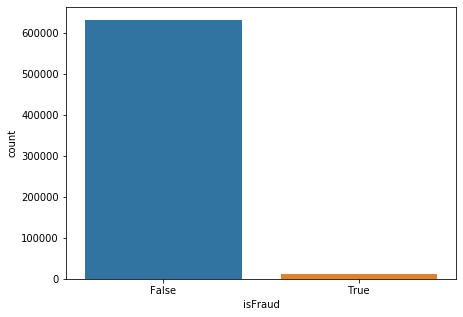

In [9]:
##The target variable is isFraud
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
ratio=data_q1['isFraud'].sum()/len(data_q1)
print('The target variable isFraud is very imbalanced! The positive ratio is %f!'%ratio)
plt.figure(figsize=(7,5))
sns.countplot(data_q1['isFraud'])
plt.show()

# Q2:Plot

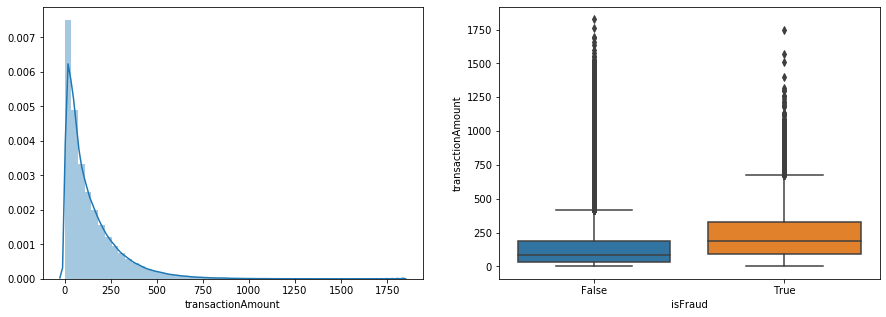

In [10]:
data_q2=data_q1.copy()
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(121)
sns.distplot(data_q2['transactionAmount'],ax=ax1)
ax2=fig.add_subplot(122)
sns.boxplot(x='isFraud',y='transactionAmount',data=data_q2,ax=ax2)
plt.show()

# Q3: Data Wrangling - Duplicate Transactions

## 3.1 Multiple-Swipe

In [11]:
##concate all feature value except transaction date time, naming concate value
##concate value is a long string which can identify the duplicated (exact same feature values) rows, regardless of transaction date time
data_q3=data_q1.copy()
data_q3.insert(22,'concat_value',data_q3.drop(['transactionDateTime'],axis=1).applymap(str).apply(''.join,axis=1))
data_q3.head(3)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,concat_value,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000,0.00,04/2020,...,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,7334937722014-08-03US5000.04929184False50000.0...,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000,111.33,06/2023,...,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,7334937722014-08-03US4888.674929184False500011...,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000,136.08,12/2027,...,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,7334937722014-08-03US4863.924929184False500013...,PURCHASE


In [12]:
data_q3=data_q3.sort_values(by=['concat_value','transactionDateTime'])
g=data_q3.groupby('concat_value')
data_q3.insert(22,'transactionDateTime_shift',g['transactionDateTime'].shift(1))
data_q3['transactionDateTime_shift']=data_q3['transactionDateTime_shift'].apply(lambda x: str(x))
data_q3.head(3)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionDateTime_shift,concat_value,transactionType
583558,100547107,2011-10-30,US,1118.27,786,1222,True,2500,1381.73,05/2021,...,fastfood,US,Quizno's #353204,01,02,310.15,2016-11-30T08:17:15,nan,1005471072011-10-30US1118.277861222True2500138...,PURCHASE
583557,100547107,2011-10-30,US,1228.72,786,1222,True,2500,1271.28,09/2026,...,fastfood,US,Quizno's #537448,01,05,110.45,2016-11-29T20:15:45,nan,1005471072011-10-30US1228.727861222True2500127...,PURCHASE
583499,100547107,2011-10-30,US,1363.02,786,1222,True,2500,1136.98,07/2021,...,fastfood,US,Subway #344185,01,80,147.13,2016-03-29T05:01:06,nan,1005471072011-10-30US1363.027861222True2500113...,PURCHASE


In [13]:
from datetime import datetime
def time_diff(row):
    if row['transactionDateTime_shift']!='nan':
        transactionDateTime=datetime.strptime(row['transactionDateTime'],
                                     '%Y-%m-%dT%H:%M:%S')
        transactionDateTime_shift=datetime.strptime(row['transactionDateTime_shift'],
                                     '%Y-%m-%dT%H:%M:%S')
        diff=(transactionDateTime-transactionDateTime_shift).total_seconds()
        return diff
    else:
        return np.nan
data_q3.insert(23,'time_diff',data_q3.apply(time_diff,axis=1))
data_q3.head(3)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionDateTime_shift,time_diff,concat_value,transactionType
583558,100547107,2011-10-30,US,1118.27,786,1222,True,2500,1381.73,05/2021,...,US,Quizno's #353204,01,02,310.15,2016-11-30T08:17:15,nan,NaN,1005471072011-10-30US1118.277861222True2500138...,PURCHASE
583557,100547107,2011-10-30,US,1228.72,786,1222,True,2500,1271.28,09/2026,...,US,Quizno's #537448,01,05,110.45,2016-11-29T20:15:45,nan,NaN,1005471072011-10-30US1228.727861222True2500127...,PURCHASE
583499,100547107,2011-10-30,US,1363.02,786,1222,True,2500,1136.98,07/2021,...,US,Subway #344185,01,80,147.13,2016-03-29T05:01:06,nan,NaN,1005471072011-10-30US1363.027861222True2500113...,PURCHASE


In [14]:
#Assume time_diff is less than 60second, they are multi-swipe!
#We can adjust the threshold for time_diff such as 120sec, 180sec....here I use 60sec!
data_muli_swipe=data_q3[data_q3['time_diff']<60]
print('There are %d transactions are belong to multiple swipe, if first transaction is not belong to dupliacted!'%len(data_muli_swipe))
print('The total amount of multiple swipe is $%f'%data_muli_swipe['transactionAmount'].sum())
data_muli_swipe.head(3)

There are 69 transactions are belong to multiple swipe, if first transaction is not belong to dupliacted!
The total amount of multiple swipe is $712.000000


,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionDateTime_shift,time_diff,concat_value,transactionType
440550,105420594,2015-05-21,US,2184.02,467,2957,False,5000,2815.98,01/2030,...,US,discount.com,08,02,0.0,2016-01-09T16:02:15,2016-01-09T16:02:13,2.0,1054205942015-05-21US2184.024672957False500028...,ADDRESS_VERIFICATION
575348,136003134,2013-06-25,US,2139.88,776,5813,False,7500,5360.12,12/2024,...,US,Delta Airlines,08,05,0.0,2016-05-20T13:57:58,2016-05-20T13:56:59,59.0,1360031342013-06-25US2139.887765813False750053...,ADDRESS_VERIFICATION
193439,136091140,2013-12-18,US,355.27,253,9621,False,5000,4644.73,01/2025,...,US,Icelandic Airlines,08,09,0.0,2016-07-22T09:03:58,2016-07-22T09:03:17,41.0,1360911402013-12-18US355.272539621False5000464...,ADDRESS_VERIFICATION


In [15]:
print('Most of multiple swipe transactions are for ADDRESS VERIFICATION which amount are always zero!')
print(data_muli_swipe['transactionType'].value_counts())
print(data_muli_swipe[data_muli_swipe['transactionType']=='ADDRESS_VERIFICATION']['transactionAmount'].value_counts())

Most of multiple swipe transactions are for ADDRESS VERIFICATION which amount are always zero!
ADDRESS_VERIFICATION    63
PURCHASE                 6
Name: transactionType, dtype: int64
0.0    63
Name: transactionAmount, dtype: int64


In [16]:
print('There is no fraud transaction among multipe swipe!')
data_muli_swipe['isFraud'].value_counts()

There is no fraud transaction among multipe swipe!


False    69
Name: isFraud, dtype: int64

## 3.2 Reversal Transaction

In [17]:
data_reversal=data_q3[data_q3['transactionType']=='REVERSAL']
print('There are %d transactions are belong to reversal!'%len(data_reversal))
print('The total amount of reversal is $%f'%data_reversal['transactionAmount'].sum())
data_reversal.head(3)

There are 16162 transactions are belong to reversal!
The total amount of reversal is $2242915.100000


,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionDateTime_shift,time_diff,concat_value,transactionType
583565,100547107,2011-10-30,US,1449.93,786,1222,True,2500,1050.07,02/2026,...,US,Subway #540372,01,05,316.52,2016-12-19T19:11:57,nan,NaN,1005471072011-10-30US1449.937861222True2500105...,REVERSAL
583532,100547107,2011-10-30,US,1612.89,786,1222,True,2500,887.11,08/2023,...,US,Dunkin' Donuts #164240,01,05,223.42,2016-08-22T20:36:57,nan,NaN,1005471072011-10-30US1612.897861222True2500887...,REVERSAL
104597,100634414,2015-12-24,US,8857.43,242,1421,True,10000,1142.57,05/2029,...,US,Renaissance Hotel #696523,01,09,127.15,2016-11-22T07:19:32,nan,NaN,1006344142015-12-24US8857.432421421True1000011...,REVERSAL


# Q4: Model

## 4.1 Create new features & Delete redundent features

In [18]:
##fill_NA for all features
data=data_q1.copy()
for i in NA_features:
    freq_value=data[i].value_counts().index[0]
    data[i].fillna(freq_value,inplace=True)

In [19]:
def kick_out(feature_list,feature):
    if feature in feature_list:
        feature_list.remove(feature)
    else:
        pass
def add_in(feature_list,feature):
    if feature not in feature_list:
        feature_list.append(feature)
    else:
        pass 
def drop_feature(df,feature):
    if feature in df.columns:
        return df.drop([feature],axis=1)
    else:
        return df
##create new feature CVVInMatch, drop enteredCVV, since CVVInMatch measures the accuracy of entering CVV!
data['CVVInMatch']=(data['cardCVV']==data['enteredCVV'])
data=drop_feature(data,'enteredCVV')
add_in(categorical_features,'CVVInMatch')
kick_out(categorical_features,'enteredCVV')
print('Distribution of CVVInMatch:')
print(data['CVVInMatch'].value_counts())

Distribution of CVVInMatch:
True     635977
False      5937
Name: CVVInMatch, dtype: int64


In [20]:
##account_number exactly the same as cust_id
##only keep customerID, drop account_num
print('count of rows with different account number and customer ID:')
print((data['accountNumber']!=data['customerId']).values.sum())
data=drop_feature(data,'accountNumber')
kick_out(categorical_features,'accountNumber')

count of rows with different account number and customer ID:
0


In [21]:
##availableMoney=creditLimit-currentBalance
##drop availableMoney!
data=drop_feature(data,'availableMoney')
kick_out(interval_features,'availableMoney')

In [22]:
##Since the year, month these kinds of seasonal features may be good for prediction
##create features: year, month and hours in a day from date_features
##notice there is no missing data in date_features, we can create featres before fill in missing data
def to_year(x,feature):
    if feature in ('accountOpenDate',
                   'dateOfLastAddressChange',
                  'transactionDateTime'):
        return x[:4]
    elif feature == 'currentExpDate':
        return x[3:7]
    else:
        print('input feature name is incorrect!')
        raise ValueError

def to_month(x,feature):
    if feature in ('accountOpenDate',
                   'dateOfLastAddressChange',
                  'transactionDateTime'):
        return x[5:7]
    elif feature=='currentExpDate':
        return x[:2]
    else:
        print('input feature name is incorrect!')
        raise ValueError
        
def to_time(x,feature):
    if feature=='transactionDateTime':
        return x[11:13]
    else:
        print('input feature name is incorrect!')
        raise ValueError
##run
for feat in date_features:
    data[feat+'_year']=data[feat].apply(to_year,args=(feat,)).values
    data[feat+'_month']=data[feat].apply(to_month,args=(feat,)).values
    add_in(categorical_features,feat+'_year')
    add_in(categorical_features,feat+'_month')
feat='transactionDateTime'
data[feat+'_time']=data[feat].apply(to_time,args=(feat,)).values
add_in(categorical_features,feat+'_time')
##drop date features
data.drop(date_features,axis=1,inplace=True)

In [23]:
##save y
import pickle
y=data['isFraud']
y.to_pickle('y.pickle')
##drop target var isFraud
data=drop_feature(data,'isFraud')
kick_out(categorical_features,'isFraud')
##reorder the features, categorical features are all before interval features
feature_final=categorical_features+interval_features
data=data[feature_final]
with open('feature_final.pickle','wb') as save:
    pickle.dump(feature_final,save)
##save data
data.to_pickle('data.pickle')

## 4.2 Feature Encoding 

In [24]:
#use OrdinalEncoder(labelEncoder) to encode all categorical features
from sklearn.preprocessing import OrdinalEncoder
import pickle
le=OrdinalEncoder()
le.fit(data[categorical_features])
with open('le.pickle','wb') as save:
    pickle.dump(le,save)

In [25]:
##load data and y 
data=pd.read_pickle('data.pickle')
y=pd.read_pickle('y.pickle')
##Before conduct feature endocing, we need to split data first
##Any information from testing data should not be in encoding process
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,
                                               test_size=0.2,
                                               random_state=123,
                                               stratify=y)
train_test_index={'x_train':x_train.index,'x_test':x_test.index,'y_train':y_train.index,'y_test':y_test.index}
with open('train_test_index.pickle','wb') as save:
    pickle.dump(train_test_index,save)

In [27]:
##OrdinalEncoder(labelEncoder) for traing data
x_train_le=le.fit_transform(x_train[categorical_features])
x_train_le=np.append(x_train_le,np.array(x_train[interval_features]),axis=1)
with open('x_train_le.pickle','wb') as save:
    pickle.dump(x_train_le,save)
##Onehot-Encoding
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(handle_unknown='ignore',categorical_features=[i for i in range(len(categorical_features))])
x_train_ohe=ohe.fit_transform(x_train_le)
with open('x_train_ohe.pickle','wb') as save:
    pickle.dump(x_train_ohe,save)
with open('ohe.pickle','wb') as save:
    pickle.dump(ohe,save)

D:\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
